In [1]:
import numpy as np
import matplotlib.pyplot as plt

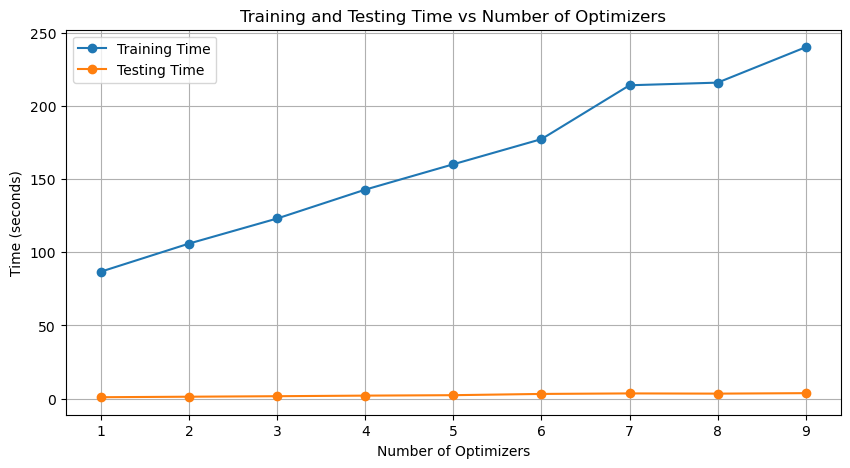

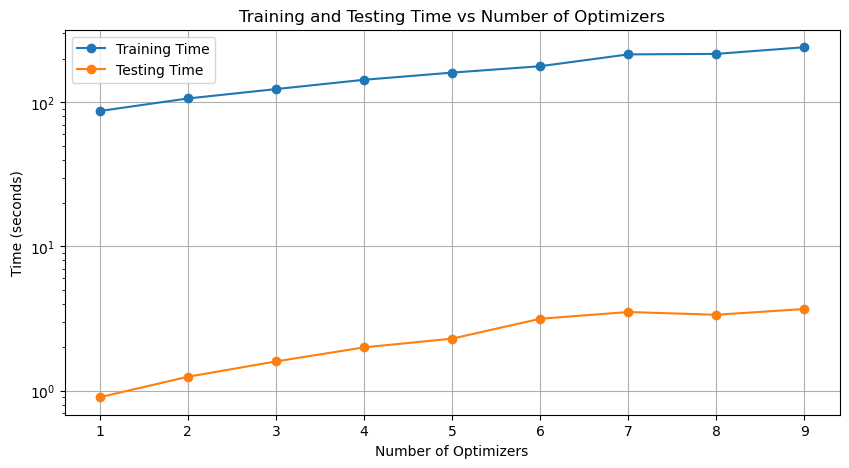

In [7]:
## Times for training and testing
times_train = np.array([86.86043238639832, 106.05999040603638, 123.19882440567017, 142.9445357322693, 160.29705834388733, 177.49205541610718, 214.33200645446777, 216.13004279136658, 240.35727310180664])
times_test = np.array([0.9014897346496582, 1.2495019435882568, 1.5960447788238525, 1.9974737167358398, 2.2961010932922363, 3.153033971786499, 3.511620044708252, 3.361135721206665, 3.685124635696411])


plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, 10), times_train, label='Training Time', marker='o')
plt.plot(np.arange(1, 10), times_test, label='Testing Time', marker='o')
plt.xlabel('Number of Optimizers')
plt.ylabel('Time (seconds)')
plt.title('Training and Testing Time vs Number of Optimizers')
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(10, 5))
plt.semilogy(np.arange(1, 10), times_train, label='Training Time', marker='o')
plt.semilogy(np.arange(1, 10), times_test, label='Testing Time', marker='o')
plt.xlabel('Number of Optimizers')
plt.ylabel('Time (seconds)')
plt.title('Training and Testing Time vs Number of Optimizers')
plt.legend()
plt.grid()
plt.show()